In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon/amazon_reviews.csv
/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv


In [2]:
#for data wrangling and manipulation

import pandas as pd
import numpy as np

#for NLP text processing and formatting

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# For word lemmitization
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
# for word Stemming
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer

# for Machine Learning process

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit

# for Machine Learning model evaluation

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Global Parameters
stop_words = set(stopwords.words('english'))

from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

# from autosklearn.regression import AutoSklearnRegressor

import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot


[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


**Indian Language NLPs**

>!pip install inltk

>!pip install indic-nlp-library

>!pip install stanza

**DATASETS AND PREPROCESSING**

In [3]:
data = pd.read_csv("../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv")

In [4]:
df = pd.read_csv("../input/amazon/amazon_reviews.csv")

In [5]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [7]:
df.describe()

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [8]:
df.isnull().any()

Unnamed: 0              False
reviewerName             True
overall                 False
reviewText               True
reviewTime              False
day_diff                False
helpful_yes             False
helpful_no              False
total_vote              False
score_pos_neg_diff      False
score_average_rating    False
wilson_lower_bound      False
dtype: bool

In [9]:
df.dropna(inplace = True)
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0


In [10]:
df.count()

Unnamed: 0              4913
reviewerName            4913
overall                 4913
reviewText              4913
reviewTime              4913
day_diff                4913
helpful_yes             4913
helpful_no              4913
total_vote              4913
score_pos_neg_diff      4913
score_average_rating    4913
wilson_lower_bound      4913
dtype: int64

In [11]:
text = " ".join(title for title in df['reviewText'])

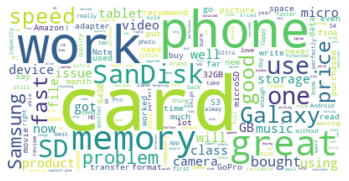

In [12]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text) # Display the generated Word Cloud 
plt.imshow(word_cloud, interpolation='bilinear') 
plt.axis("off") 
plt.show()

**Visualizing the distributions of numerical variables:**

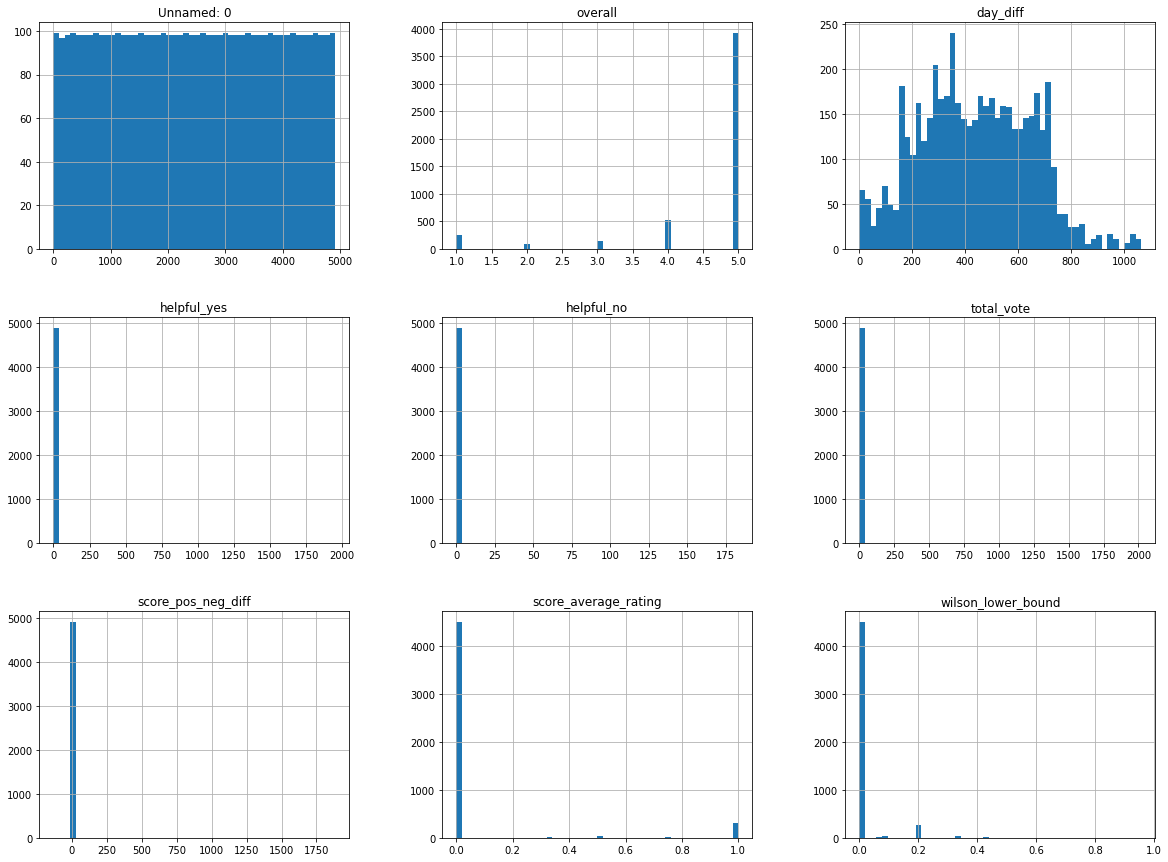

In [13]:
df.hist(bins=50, figsize=(20,15)) # builds histogram and set the number of bins and fig size (width, height)
plt.show()

**Split into Train/Test**

    Before we explore the dataset we're going to split it into training set and test sets
    
    Our goal is to eventually train a sentiment analysis classifier
    
    Since the majority of reviews are positive (5 stars), we will need to do a stratified split on the reviews score to ensure that we don't train the classifier on imbalanced data
    
    To use sklearn's Stratified ShuffleSplit class, we're going to remove all samples that have NAN in review score, then covert all review scores to integer datatype

In [14]:
print("Before {}".format(len(df)))
dataAfter = df.dropna(subset=["overall"]) # removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["overall"] = dataAfter["overall"].astype(int)

Before 4913
After 4913


In [15]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["overall"]): 
    start_train = dataAfter.reindex(train_index)
    start_test = dataAfter.reindex(test_index)

Check to see if train/test sets were stratified proportionately in comparison to raw data.

In [16]:
len(start_train)

3930

In [17]:
start_train["overall"].value_counts()/len(start_train) # value_count() counts all the values based on column

5.0    0.798982
4.0    0.108651
1.0    0.046310
3.0    0.030025
2.0    0.015522
Name: overall, dtype: float64

In [18]:
len(start_test)

983

**Data Exploration (Training Set)**

In [19]:
reviews = start_train.copy()
reviews.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
4051,4051.0,S. Andersom,5.0,This is what I needed for my tablet and it wor...,2013-03-01,647.0,0.0,0.0,0.0,0.0,0.0,0.0
4435,4435.0,Tebowned,5.0,"Love it, use it to store videos and photos on ...",2013-07-18,508.0,0.0,0.0,0.0,0.0,0.0,0.0
4118,4118.0,Sean P,4.0,The card works with a Galaxy Note 2. Install ...,2013-04-28,589.0,0.0,0.0,0.0,0.0,0.0,0.0
3265,3265.0,"M. Metras ""metras3""",5.0,My first computer had 64k of RAM.I just put th...,2014-01-19,323.0,0.0,0.0,0.0,0.0,0.0,0.0
88,88.0,A. Gutierrez,5.0,THis memory helps me to keep all what I want t...,2014-04-21,231.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3930 entries, 4051 to 1363
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3928 non-null   float64
 1   reviewerName          3928 non-null   object 
 2   overall               3928 non-null   float64
 3   reviewText            3928 non-null   object 
 4   reviewTime            3928 non-null   object 
 5   day_diff              3928 non-null   float64
 6   helpful_yes           3928 non-null   float64
 7   helpful_no            3928 non-null   float64
 8   total_vote            3928 non-null   float64
 9   score_pos_neg_diff    3928 non-null   float64
 10  score_average_rating  3928 non-null   float64
 11  wilson_lower_bound    3928 non-null   float64
dtypes: float64(9), object(3)
memory usage: 399.1+ KB


**Correlations**

In [21]:
corr_matrix = reviews.corr()
corr_matrix

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
Unnamed: 0,1.000000,-0.021307,-0.006492,0.010285,0.012922,0.010877,0.009556,0.009999,0.008861
overall,-0.021307,1.000000,-0.086658,-0.035916,-0.068787,-0.040133,-0.030964,-0.148449,-0.139130
day_diff,-0.006492,-0.086658,1.000000,0.042055,0.028467,0.042264,0.041552,0.123100,0.133789
helpful_yes,0.010285,-0.035916,0.042055,1.000000,0.592542,0.997322,0.996638,0.111980,0.359538
helpful_no,0.012922,-0.068787,0.028467,0.592542,1.000000,0.649870,0.524555,0.088263,0.281037
total_vote,0.010877,-0.040133,0.042264,0.997322,0.649870,1.000000,0.987977,0.113669,0.364749
score_pos_neg_diff,0.009556,-0.030964,0.041552,0.996638,0.524555,0.987977,1.000000,0.109375,0.351414
score_average_rating,0.009999,-0.148449,0.123100,0.111980,0.088263,0.113669,0.109375,1.000000,0.867688
wilson_lower_bound,0.008861,-0.139130,0.133789,0.359538,0.281037,0.364749,0.351414,0.867688,1.000000


In [22]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3930 entries, 4051 to 1363
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3928 non-null   float64
 1   reviewerName          3928 non-null   object 
 2   overall               3928 non-null   float64
 3   reviewText            3928 non-null   object 
 4   reviewTime            3928 non-null   object 
 5   day_diff              3928 non-null   float64
 6   helpful_yes           3928 non-null   float64
 7   helpful_no            3928 non-null   float64
 8   total_vote            3928 non-null   float64
 9   score_pos_neg_diff    3928 non-null   float64
 10  score_average_rating  3928 non-null   float64
 11  wilson_lower_bound    3928 non-null   float64
dtypes: float64(9), object(3)
memory usage: 399.1+ KB


**Sentiment Analysis on Number Based Reviews**

**Set Target Variable (Sentiments)**

    Segregate ratings from 1-5 into positive, neutral, and negative.

In [23]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1) or (rating == 0):
        return "Negative"
# Add sentiments to the data
start_train["Sentiment"] = start_train["overall"].apply(sentiments)
start_test["Sentiment"] = start_test["overall"].apply(sentiments)
start_train["Sentiment"][:20]

4051    Positive
4435    Positive
4118    Positive
3265    Positive
88      Positive
1265    Positive
3974    Positive
2452    Positive
259     Positive
1277    Positive
548     Positive
354     Positive
568     Positive
2734    Positive
4613    Positive
311     Positive
3916    Positive
1218    Positive
1119    Positive
2069    Positive
Name: Sentiment, dtype: object

In [24]:
review=df[['reviewText','overall']]
review.head()

,reviewText,overall
1,"Purchased this for my device, it worked as adv...",5.0
2,it works as expected. I should have sprung for...,4.0
3,This think has worked out great.Had a diff. br...,5.0
4,"Bought it with Retail Packaging, arrived legit...",5.0
5,It's mini storage. It doesn't do anything els...,5.0


In [25]:
round(review.isnull().sum().sort_values(ascending=False)*100/len(review),2)

reviewText    0.0
overall       0.0
dtype: float64

In [26]:
review=review.dropna()
review.head()

,reviewText,overall
1,"Purchased this for my device, it worked as adv...",5.0
2,it works as expected. I should have sprung for...,4.0
3,This think has worked out great.Had a diff. br...,5.0
4,"Bought it with Retail Packaging, arrived legit...",5.0
5,It's mini storage. It doesn't do anything els...,5.0


In [27]:
review['overall'].unique()

array([5., 4., 3., 1., 2.])

In [28]:
review.overall.value_counts()

5.0    3921
4.0     526
1.0     244
3.0     142
2.0      80
Name: overall, dtype: int64

In [29]:
review['encoded_cat'] = review.overall.astype('category').cat.codes
review.head()

,reviewText,overall,encoded_cat
1,"Purchased this for my device, it worked as adv...",5.0,4
2,it works as expected. I should have sprung for...,4.0,3
3,This think has worked out great.Had a diff. br...,5.0,4
4,"Bought it with Retail Packaging, arrived legit...",5.0,4
5,It's mini storage. It doesn't do anything els...,5.0,4


In [30]:
def preprocess_review_text(review):
    """
    Function to process the the review text and tranform it into format usable by Machine learning models
    """
    
    # to convert all the characters of the review into lower case alphabets
    review.lower()
    
    # Remove urls from the reviews
    review = re.sub(r"http\S+|www\S+|https\S+", '', review, flags=re.MULTILINE)
    
    # Remove user related references from the reviews:: '@' and '#' 
    review = re.sub(r'\@\w+|\#','', review)
    
    # Remove punctuations from the reviews
    review = review.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stopwords from the reviews
    review_tokens = word_tokenize(review)
    filtered_words = [w for w in review_tokens if not w in stop_words]
    joined_text = " ".join(filtered_words)
    
    return joined_text

In [31]:
def get_feature_vector(train_fit):
    """
    Function to Convert a collection of raw documents to a matrix of TF-IDF features.
    TF-IDF - Term Frequency Inverse Documnet Frequency
    """
    
    vector = TfidfVectorizer(sublinear_tf=True)      # Defining the vector
    vector.fit(train_fit)                            # fitting the data into the vector
    return vector                                    # returning the vector as function call

In [32]:
processed_text = df['reviewText'].apply(preprocess_review_text)

print("Processed text :: \n\n", processed_text)

Processed text :: 

 1       Purchased device worked advertised You never m...
2       works expected I sprung higher capacity I thin...
3       This think worked greatHad diff bran 64gb card...
4       Bought Retail Packaging arrived legit orange e...
5       Its mini storage It doesnt anything else suppo...
                              ...                        
4910    I bought Sandisk 16GB Class 10 use HTC Inspire...
4911    Used extending capabilities Samsung Galaxy Not...
4912    Great card fast reliable It comes optional ada...
4913    Good amount space stuff I want fits GoPro What...
4914    Ive heard bad things 64gb Micro SD card crappi...
Name: reviewText, Length: 4913, dtype: object


In [33]:
stemmer = PorterStemmer()

stemmed_words = [stemmer.stem(i) for i in processed_text]

In [34]:
lemmatizer = WordNetLemmatizer()
lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]

In [35]:
tf_vector = get_feature_vector(np.array(df["reviewText"]).ravel())

In [36]:
X = tf_vector.transform(np.array(review["reviewText"]).ravel())     # Predictor Variable
y = np.array(review["encoded_cat"]).ravel()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [38]:
NB_model = MultinomialNB()

NB_model.fit(X_train, y_train)


MultinomialNB()

In [39]:
y_predict_nb = NB_model.predict(X_test)

print("Accuracy Score for Naive Bayes Model is :: ", accuracy_score(y_test, y_predict_nb))

Accuracy Score for Naive Bayes Model is ::  0.7863682604272635


In [40]:
print("Classification_Report :: \n\n", classification_report(y_test, y_predict_nb))

Classification_Report :: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00       117
           4       0.79      1.00      0.88       774

    accuracy                           0.79       983
   macro avg       0.16      0.20      0.18       983
weighted avg       0.62      0.79      0.69       983



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [41]:
# Training Logistics Regression model
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_predict_lr = LR_model.predict(X_test)

print("Accuracy Score for Logistic Regression Model is :: ",accuracy_score(y_test, y_predict_lr))

Accuracy Score for Logistic Regression Model is ::  0.797558494404883


In [43]:
from sklearn.metrics import classification_report

print("Classification_Report :: \n\n", classification_report(y_test, y_predict_lr))

Classification_Report :: 

               precision    recall  f1-score   support

           0       0.65      0.23      0.34        48
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00       117
           4       0.80      1.00      0.89       774

    accuracy                           0.80       983
   macro avg       0.29      0.25      0.25       983
weighted avg       0.66      0.80      0.72       983



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [44]:
round(df['overall'].value_counts()*100/len(df),2)

5.0    79.81
4.0    10.71
1.0     4.97
3.0     2.89
2.0     1.63
Name: overall, dtype: float64

In [45]:
df = df.sort_values("wilson_lower_bound", ascending=False)
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5.0,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,2013-01-05,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5.0,I have tested dozens of SDHC and micro-SDHC ca...,2012-09-26,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1.0,NOTE: please read the last update (scroll to ...,2013-05-08,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1.0,"If your card gets hot enough to be painful, it...",2012-02-09,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5.0,Sandisk announcement of the first 128GB micro ...,2014-07-03,158,45,4,49,41,0.918367,0.808109


In [46]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_dataframe(df, head=5, tail = 5):
    
    print(" SHAPE ".center(82,'~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print(" TYPES ".center(82,'~'))
    print(df.dtypes)
    print("".center(82,'~'))
    print(missing_values_analysis(df))
    print(' DUPLICATED VALUES '.center(83,'~'))
    print(df.duplicated().sum())
    print(" QUANTILES ".center(82,'~'))
    print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_dataframe(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ SHAPE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 4913
Columns: 11
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ TYPES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
reviewerName             object
overall                 float64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Empty DataFrame
Columns: [Total Missing Values, Ratio]
Index: []
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ DUPLICATED VALUES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ QUANTILES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                       0.00  0.05   0.50        0.95       0.99         1.00
overall                 1.0   2.0    5.0    5.00000

In [47]:
def check_class(dataframe):
    nunique_df = pd.DataFrame({'Variable': dataframe.columns,
                               'Classes': [dataframe[i].nunique() \
                                           for i in dataframe.columns]})

    nunique_df = nunique_df.sort_values('Classes', ascending=False)
    nunique_df = nunique_df.reset_index(drop = True)
    return nunique_df

check_class(df)

,Variable,Classes
0,reviewText,4912
1,reviewerName,4593
2,reviewTime,689
3,day_diff,689
4,wilson_lower_bound,40
5,score_average_rating,28
6,score_pos_neg_diff,27
7,total_vote,26
8,helpful_yes,23
9,helpful_no,17


In [48]:
constraints = ['#581845','#C70039','#2E4053','#1ABC9C','#7F8C8D']

def categorical_variable_summary(df, column_name):
    fig = make_subplots(rows=1,cols=2,
                        subplot_titles=('Countplot','Percentages'),
                        specs=[[{"type": "xy"}, {'type':'domain'}]])

    fig.add_trace(go.Bar( y = df[column_name].value_counts().values.tolist(), 
                          x = [str(i) for i in df[column_name].value_counts().index], 
                          text = df[column_name].value_counts().values.tolist(),
                          textfont = dict(size=15),
                          name = column_name,
                          textposition = 'auto',
                          showlegend=False,
                          marker=dict(color = constraints,
                                      line=dict(color='#DBE6EC',
                                                width=1))),
                  row = 1, col = 1)
    
    fig.add_trace(go.Pie(labels= df[column_name].value_counts().keys(),
                         values= df[column_name].value_counts().values,
                         textfont = dict(size = 20),
                         textposition='auto',
                         showlegend = False,
                         name = column_name,
                         marker=dict(colors=constraints)),
                  row = 1, col = 2)
    
    fig.update_layout(title={'text': column_name,
                             'y':0.9,
                             'x':0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')
    
    iplot(fig)

In [49]:
categorical_variable_summary(df,'overall')

In [50]:
df.reviewText.head()

2031    [[ UPDATE - 6/19/2014 ]]So my lovely wife boug...
3449    I have tested dozens of SDHC and micro-SDHC ca...
4212    NOTE:  please read the last update (scroll to ...
317     If your card gets hot enough to be painful, it...
4672    Sandisk announcement of the first 128GB micro ...
Name: reviewText, dtype: object

In [51]:
example_review = df.reviewText[2031]
example_review

'[[ UPDATE - 6/19/2014 ]]So my lovely wife bought me a Samsung Galaxy Tab 4 for Father\'s Day and I\'ve been loving it ever since.  Just as other with Samsung products, the Galaxy Tab 4 has the ability to add a microSD card to expand the memory on the device.  Since it\'s been over a year, I decided to do some more research to see if SanDisk offered anything new.  As of 6/19/2014, their product lineup for microSD cards from worst to best (performance-wise) are the as follows:SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow, the difference between all of these cards are simply the speed in which you can read/write data to the card.  Yes, the published rating of most all these cards (except the SanDisk regular) are Class 10/UHS-I but that\'s just a rating... Actual real world performance does get better with each model, but with faster cards come more expensive prices.  Since Amazon doesn\'t carry the Ultra PLUS model of microSD card, I had 

In [52]:
example_review = re.sub("[^a-zA-Z]",' ',example_review)
example_review

'   UPDATE               So my lovely wife bought me a Samsung Galaxy Tab   for Father s Day and I ve been loving it ever since   Just as other with Samsung products  the Galaxy Tab   has the ability to add a microSD card to expand the memory on the device   Since it s been over a year  I decided to do some more research to see if SanDisk offered anything new   As of            their product lineup for microSD cards from worst to best  performance wise  are the as follows SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow  the difference between all of these cards are simply the speed in which you can read write data to the card   Yes  the published rating of most all these cards  except the SanDisk regular  are Class    UHS I but that s just a rating    Actual real world performance does get better with each model  but with faster cards come more expensive prices   Since Amazon doesn t carry the Ultra PLUS model of microSD card  I had to do

In [53]:
example_review = example_review.lower().split()

In [54]:
example_review

['update',
 'so',
 'my',
 'lovely',
 'wife',
 'bought',
 'me',
 'a',
 'samsung',
 'galaxy',
 'tab',
 'for',
 'father',
 's',
 'day',
 'and',
 'i',
 've',
 'been',
 'loving',
 'it',
 'ever',
 'since',
 'just',
 'as',
 'other',
 'with',
 'samsung',
 'products',
 'the',
 'galaxy',
 'tab',
 'has',
 'the',
 'ability',
 'to',
 'add',
 'a',
 'microsd',
 'card',
 'to',
 'expand',
 'the',
 'memory',
 'on',
 'the',
 'device',
 'since',
 'it',
 's',
 'been',
 'over',
 'a',
 'year',
 'i',
 'decided',
 'to',
 'do',
 'some',
 'more',
 'research',
 'to',
 'see',
 'if',
 'sandisk',
 'offered',
 'anything',
 'new',
 'as',
 'of',
 'their',
 'product',
 'lineup',
 'for',
 'microsd',
 'cards',
 'from',
 'worst',
 'to',
 'best',
 'performance',
 'wise',
 'are',
 'the',
 'as',
 'follows',
 'sandisksandisk',
 'ultrasandisk',
 'ultra',
 'plussandisk',
 'extremesandisk',
 'extreme',
 'plussandisk',
 'extreme',
 'pronow',
 'the',
 'difference',
 'between',
 'all',
 'of',
 'these',
 'cards',
 'are',
 'simply',
 

In [55]:
rt = lambda x: re.sub("[^a-zA-Z]",' ',str(x))
df["reviewText"] = df["reviewText"].map(rt)
df["reviewText"] = df["reviewText"].str.lower()
df.head(10)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5.0,update so my lovely wife boug...,2013-01-05,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5.0,i have tested dozens of sdhc and micro sdhc ca...,2012-09-26,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1.0,note please read the last update scroll to ...,2013-05-08,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1.0,if your card gets hot enough to be painful it...,2012-02-09,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5.0,sandisk announcement of the first gb micro ...,2014-07-03,158,45,4,49,41,0.918367,0.808109
1835,goconfigure,5.0,bought from bestbuy online the day it was anno...,2014-02-28,283,60,8,68,52,0.882353,0.784651
3981,"R. Sutton, Jr. ""RWSynergy""",5.0,the last few days i have been diligently shopp...,2012-10-22,777,112,27,139,85,0.805755,0.732136
3807,R. Heisler,3.0,i bought this card to replace a lost gig in...,2013-02-27,649,22,3,25,19,0.880000,0.700442
4306,Stellar Eller,5.0,while i got this card as a deal of the day o...,2012-09-06,823,51,14,65,37,0.784615,0.670334
4596,"Tom Henriksen ""Doggy Diner""",1.0,hi i ordered two card and they arrived the nex...,2012-09-22,807,82,27,109,55,0.752294,0.663595


In [56]:
'''
# Sentiment analysis
# TextBlob Exit will return polarity and subjectivity.
# Polarity indicates your mood, that is, whether it is positive.
# It returns a value between 0 and 1. The closer to 1 the more positive, the closer to 0 the more negative.
'''

df[['polarity', 'subjectivity']] = df['reviewText'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in df['reviewText'].iteritems():

    score = SentimentIntensityAnalyzer().polarity_scores(row)

    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if neg > pos:
        df.loc[index, 'sentiment'] = "Negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "Positive"
    else:
        df.loc[index, 'sentiment'] = "neutral"

In [57]:
df[df["sentiment"] == "Positive"].sort_values("wilson_lower_bound", ascending=False).head(5)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
2031,"Hyoun Kim ""Faluzure""",5.0,update so my lovely wife boug...,2013-01-05,702,1952,68,2020,1884,0.966337,0.957544,0.163859,0.562259,Positive
3449,NLee the Engineer,5.0,i have tested dozens of sdhc and micro sdhc ca...,2012-09-26,803,1428,77,1505,1351,0.948837,0.936519,0.103870,0.516435,Positive
4212,SkincareCEO,1.0,note please read the last update scroll to ...,2013-05-08,579,1568,126,1694,1442,0.925620,0.912139,0.212251,0.505394,Positive
317,"Amazon Customer ""Kelly""",1.0,if your card gets hot enough to be painful it...,2012-02-09,1033,422,73,495,349,0.852525,0.818577,0.143519,0.494207,Positive
4672,Twister,5.0,sandisk announcement of the first gb micro ...,2014-07-03,158,45,4,49,41,0.918367,0.808109,0.172332,0.511282,Positive


In [58]:
categorical_variable_summary(df,'sentiment')

In [59]:
df.groupby(["sentiment"])[['overall']].mean()

,overall
sentiment,
Negative,3.968051
Positive,4.737439
neutral,4.687500
